# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I were booke...
1,Not Verified | We had to change from AA to BA...
2,✅ Trip Verified | After paying $6500 for ticke...
3,✅ Trip Verified | An excellent flight on BA Ci...
4,✅ Trip Verified | Crew were amazing and atte...


In [ ]:
df.to_csv("/content/sample_data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,✅ Trip Verified | My family and I were booke...
1,Not Verified | We had to change from AA to BA...
2,✅ Trip Verified | After paying $6500 for ticke...
3,✅ Trip Verified | An excellent flight on BA Ci...
4,✅ Trip Verified | Crew were amazing and atte...
...,...
995,Not Verified | London to Sydney via Singapore...
996,✅ Trip Verified | Phoenix to Amsterdam via Lo...
997,"✅ Trip Verified | Standard, run of the mill a..."
998,✅ Trip Verified | Belfast City to Atlanta via...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,My family and I were booked to leave London...
1,We had to change from AA to BA for a flight ...
2,After paying $6500 for tickets for my family ...
3,An excellent flight on BA CityFlyer. The plan...
4,"Crew were amazing and attentive, nothing wa..."
...,...
995,London to Sydney via Singapore. Checked in w...
996,Phoenix to Amsterdam via London. It was 10 h...
997,"Standard, run of the mill airline for today'..."
998,Belfast City to Atlanta via London Heathrow ...


In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My family and I were booked to leave London...,My family and I were booked to leave London f...
1,We had to change from AA to BA for a flight ...,We had to change from AA to BA for a flight t...
2,After paying $6500 for tickets for my family ...,After paying for tickets for my family includ...
3,An excellent flight on BA CityFlyer. The plan...,An excellent flight on BA CityFlyer The plane...
4,"Crew were amazing and attentive, nothing wa...",Crew were amazing and attentive nothing was m...


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London..."
1,We had to change from AA to BA for a flight ...,We had to change from AA to BA for a flight t...,"[(change, v), (AA, n), (BA, n), (flight, n), (..."
2,After paying $6500 for tickets for my family ...,After paying for tickets for my family includ...,"[(paying, v), (tickets, n), (family, n), (incl..."
3,An excellent flight on BA CityFlyer. The plan...,An excellent flight on BA CityFlyer The plane...,"[(excellent, a), (flight, n), (BA, n), (CityFl..."
4,"Crew were amazing and attentive, nothing wa...",Crew were amazing and attentive nothing was m...,"[(Crew, n), (amazing, a), (attentive, a), (not..."


In [ ]:

# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London...",family book leave London Hong Kong August ma...
1,We had to change from AA to BA for a flight ...,We had to change from AA to BA for a flight t...,"[(change, v), (AA, n), (BA, n), (flight, n), (...",change AA BA flight London missed connection...
2,After paying $6500 for tickets for my family ...,After paying for tickets for my family includ...,"[(paying, v), (tickets, n), (family, n), (incl...",pay ticket family include pay sit together t...
3,An excellent flight on BA CityFlyer. The plan...,An excellent flight on BA CityFlyer The plane...,"[(excellent, a), (flight, n), (BA, n), (CityFl...",excellent flight BA CityFlyer plane clean co...
4,"Crew were amazing and attentive, nothing wa...",Crew were amazing and attentive nothing was m...,"[(Crew, n), (amazing, a), (attentive, a), (not...",Crew amazing attentive nothing miss definite...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,My family and I were booked to leave London...,family book leave London Hong Kong August ma...
1,We had to change from AA to BA for a flight ...,change AA BA flight London missed connection...
2,After paying $6500 for tickets for my family ...,pay ticket family include pay sit together t...
3,An excellent flight on BA CityFlyer. The plan...,excellent flight BA CityFlyer plane clean co...
4,"Crew were amazing and attentive, nothing wa...",Crew amazing attentive nothing miss definite...
...,...,...
995,London to Sydney via Singapore. Checked in w...,London Sydney via Singapore Checked bag kg a...
996,Phoenix to Amsterdam via London. It was 10 h...,Phoenix Amsterdam via London hrs delayed fli...
997,"Standard, run of the mill airline for today'...",Standard run mill airline today economy Flew...
998,Belfast City to Atlanta via London Heathrow ...,Belfast City Atlanta via London Heathrow Che...


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London...",family book leave London Hong Kong August ma...,-0.8689,Negative
1,We had to change from AA to BA for a flight ...,We had to change from AA to BA for a flight t...,"[(change, v), (AA, n), (BA, n), (flight, n), (...",change AA BA flight London missed connection...,0.3979,Neutral
2,After paying $6500 for tickets for my family ...,After paying for tickets for my family includ...,"[(paying, v), (tickets, n), (family, n), (incl...",pay ticket family include pay sit together t...,0.7783,Positive
3,An excellent flight on BA CityFlyer. The plan...,An excellent flight on BA CityFlyer The plane...,"[(excellent, a), (flight, n), (BA, n), (CityFl...",excellent flight BA CityFlyer plane clean co...,0.9873,Positive
4,"Crew were amazing and attentive, nothing wa...",Crew were amazing and attentive nothing was m...,"[(Crew, n), (amazing, a), (attentive, a), (not...",Crew amazing attentive nothing miss definite...,0.8830,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,468
Negative,421
Neutral,111


([<matplotlib.patches.Wedge at 0x78a68f7b1060>,
 [Text(0.11039790437095814, 1.0944461168602595, 'Positive'),
  Text(-0.4777168749993115, -0.990851445647072, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(0.06021703874779535, 0.5969706091965051, '46.8%'),
  Text(-0.2605728409087153, -0.5404644248984029, '42.1%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

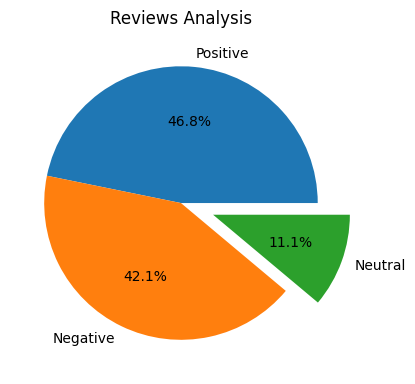

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

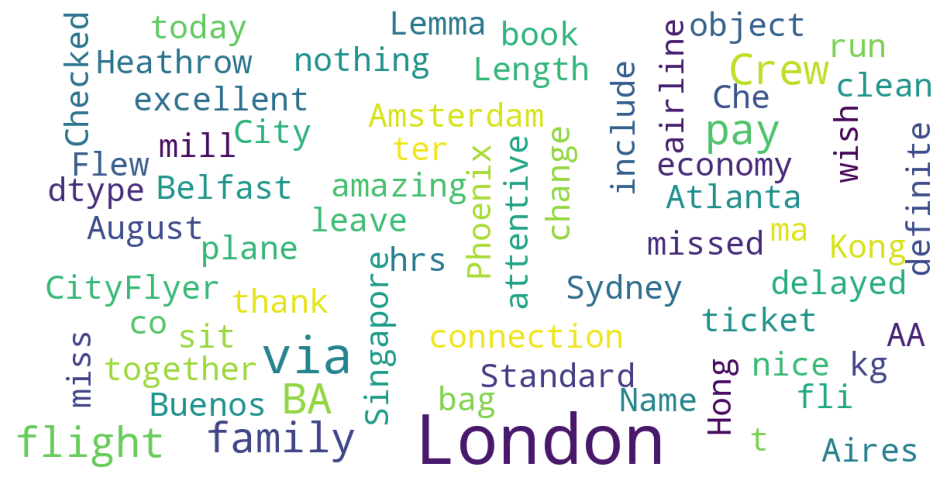

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)